# Yoga image classificaton

Problem statement: The interest is to make the model that will identify the yoga asanas, there are 107 type of yoga asanas here in the data set. The data size is around 1 gb, the challenge to build a model with highest accuracy and f1 score

### Importing libraries

In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Concatenate, Conv2D, GlobalAveragePooling2D, GlobalMaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adadelta, Adagrad, Adam, SGD
from tensorflow.keras.regularizers import L2, L1, L1L2

from sklearn import metrics

from tensorflow_addons.metrics import F1Score
from tensorflow.keras.utils import to_categorical, image_dataset_from_directory

from tensorflow.keras.layers import Input

from tensorflow.keras.losses import CategoricalCrossentropy, CategoricalHinge, Hinge, SparseCategoricalCrossentropy
from tensorflow.keras.layers import MaxPool2D, AveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

import PIL
import random

C:\Users\rishw\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.4.0 and strictly below 2.7.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.7.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [6]:
batch_size = 8
img_height = 180
img_width = 180

In [7]:
data_dir = 'dataset/'

In [29]:
generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [30]:
train_data_gen = generator.flow_from_directory(directory=data_dir, target_size=(img_height, img_width),
                                                     subset='training')
val_data_gen = generator.flow_from_directory(data_dir, target_size=(img_height, img_width),
                                                   subset='validation')

Found 4835 images belonging to 107 classes.
Found 1156 images belonging to 107 classes.


### Show casing some asanas

In [31]:
train_data_gen.filenames[2]

'adho mukha svanasana\\22. photo-17-05-2015-18-28-30.png'

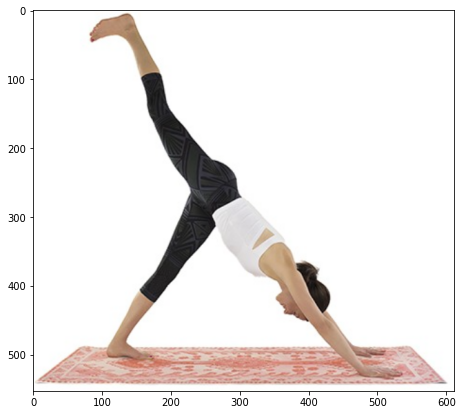

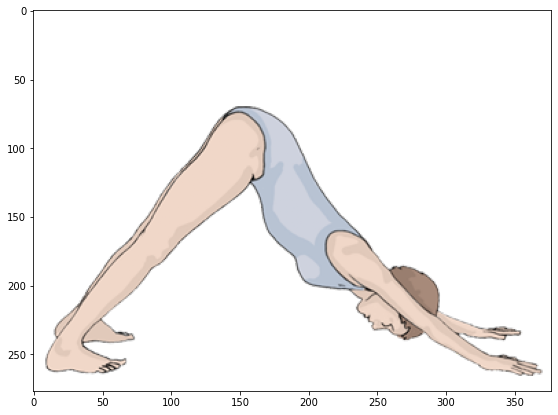

In [32]:
plt.rcParams['figure.figsize'] = 10,7
plt.imshow(plt.imread('dataset/'+train_data_gen.filenames[0]))
plt.show()
plt.imshow(plt.imread('dataset/'+train_data_gen.filenames[12]))
plt.show()

## Making model

In [110]:
%%time
# to calculate the time
# Using functional api


inp = Input(shape =(180, 180, 3)) 
x = Conv2D(64,5, activation ='relu')(inp)
x= MaxPool2D()(x)

x = Conv2D(32 ,3, activation ='relu')(x)
x= MaxPool2D()(x)

x = Conv2D(32,3, activation ='relu')(x)
x= MaxPool2D()(x)


x = Flatten()(x)
x   = Dense(256, activation ='relu')(x)  # first layer with 256 neurons
x   = Dense(128, activation ='relu')(x)
out   = Dense(107, activation= 'softmax')(x)
model = Model(inp, out)
model.summary()


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d_18 (Conv2D)          (None, 176, 176, 64)      4864      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 88, 88, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 86, 86, 32)        18464     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 43, 43, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 41, 41, 32)        9248

In [111]:
%%time
model.compile(optimizer= Adam(), loss = CategoricalCrossentropy(),
              weighted_metrics=['accuracy', F1Score(num_classes=107, average= 'weighted')] )
h = model.fit(train_data_gen, validation_data= val_data_gen,epochs= 10 , shuffle= True)

Epoch 1/10
152/152 [==============================] - 21s 138ms/step - loss: 4.6720 - accuracy: 0.0120 - f1_score: 0.0018 - val_loss: 4.6481 - val_accuracy: 0.0216 - val_f1_score: 0.0016
Epoch 2/10
152/152 [==============================] - 20s 133ms/step - loss: 4.2845 - accuracy: 0.0920 - f1_score: 0.0663 - val_loss: 3.9209 - val_accuracy: 0.1462 - val_f1_score: 0.1010
Epoch 3/10
152/152 [==============================] - 20s 130ms/step - loss: 3.2276 - accuracy: 0.2573 - f1_score: 0.2366 - val_loss: 3.4667 - val_accuracy: 0.2171 - val_f1_score: 0.1852
Epoch 4/10
152/152 [==============================] - 20s 134ms/step - loss: 2.1182 - accuracy: 0.4827 - f1_score: 0.4729 - val_loss: 3.4585 - val_accuracy: 0.2777 - val_f1_score: 0.2625
Epoch 5/10
152/152 [==============================] - 20s 130ms/step - loss: 1.0340 - accuracy: 0.7295 - f1_score: 0.7268 - val_loss: 4.4292 - val_accuracy: 0.2742 - val_f1_score: 0.2611
Epoch 6/10
152/152 [==============================] - 20s 132ms/s

## FUNCTION FOR PLOTTING

In [112]:
def plot_metric(history): # pass history for plotting 
    plt.rcParams['figure.figsize'] = 10,6
    plt.plot(history.history['loss'], label = 'training loss')
    plt.plot(history.history['val_loss'] , label = 'validation loss')
    plt.title("LOSS", fontdict= {'size': 15})
    plt.grid(True)
    plt.legend()
    plt.show()
    
    plt.plot(history.history['accuracy'], label = 'training accuracy')
    plt.plot(history.history['val_accuracy'] , label = 'validation accuracy')
    plt.title("ACCURACY", fontdict= {'size': 15})
    plt.legend()
    plt.grid(True)
    plt.show()
    
    
    plt.plot(history.history['f1_score'], label = 'f1 score training')
    plt.plot(history.history['val_f1_score'] , label = 'f1 score validation')
    plt.title("F1 WEIGHTED SCORE", fontdict= {'size': 15})
    plt.legend()
    plt.grid(True)
    plt.show()

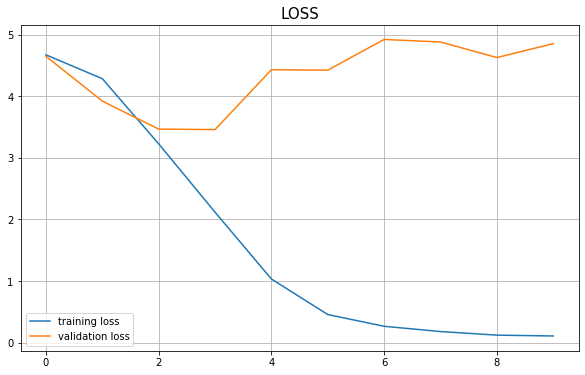

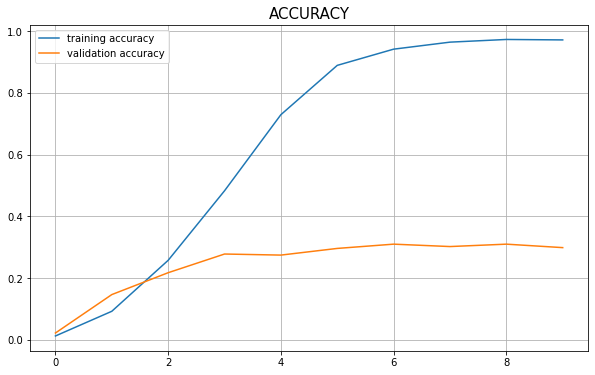

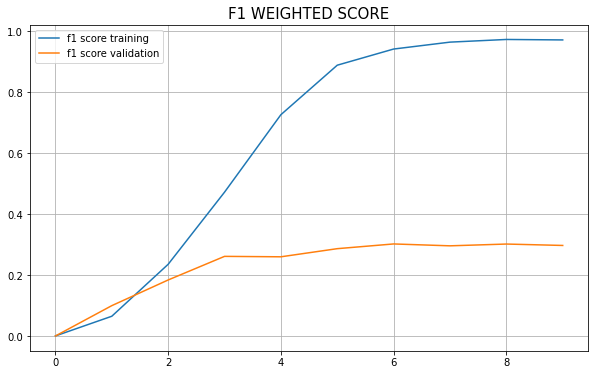

In [113]:
plot_metric(h)

due to over training the training and test performanace is not matching, one solution to problem is reduce epoch size

In [115]:
result = model.evaluate(val_data_gen)
print('loss' , result[0])
print('accuracy', result[1])
print('f1 score', result[2])

37/37 [==============================] - 4s 107ms/step - loss: 4.8531 - accuracy: 0.2984 - f1_score: 0.2983
loss 4.853097438812256
accuracy 0.29844290018081665
f1 score 0.29826775193214417


In [118]:
%%time
# improving model with reducing epoch size


# Using functional api


inp = Input(shape =(180, 180, 3)) 
x = Conv2D(64,5, activation ='relu')(inp)
x= MaxPool2D()(x)

x = Conv2D(32 ,3, activation ='relu')(x)
x= MaxPool2D()(x)

x = Conv2D(32,3, activation ='relu')(x)
x= MaxPool2D()(x)


x = Flatten()(x)
x   = Dense(256, activation ='relu')(x)  # first layer with 256 neurons
x   = Dense(128, activation ='relu')(x)
out   = Dense(107, activation= 'softmax')(x)
model = Model(inp, out)
model.summary()



model.compile(optimizer= Adam(), loss = CategoricalCrossentropy(),
              weighted_metrics=['accuracy', F1Score(num_classes=107, average= 'weighted')] )
h = model.fit(train_data_gen, validation_data= val_data_gen, epochs=   3, shuffle= True) # choosing epoch size 3 instead of 10
                                                                                        # to reduce overfitting

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d_21 (Conv2D)          (None, 176, 176, 64)      4864      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 88, 88, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 86, 86, 32)        18464     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 43, 43, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 41, 41, 32)        9248

In [119]:
result_validation = model.evaluate(val_data_gen)
print('------ For validation--------')
print('loss' , result_validation[0])
print('accuracy', result_validation[1])
print('f1 score', result_validation[2])


print('------ For training --------')
result_train = model.evaluate(train_data_gen)
print('loss' , result_train[0])
print('accuracy', result_train[1])
print('f1 score', result_train[2])

37/37 [==============================] - 4s 106ms/step - loss: 3.2226 - accuracy: 0.3296 - f1_score: 0.3124
------ For validation--------
loss 3.2225639820098877
accuracy 0.3295847773551941
f1 score 0.31242281198501587
------ For training --------
 20/152 [==>...........................] - ETA: 13s - loss: 0.9348 - accuracy: 0.8109 - f1_score: 0.8071

C:\Users\rishw\anaconda3\envs\tf-gpu\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


152/152 [==============================] - 17s 110ms/step - loss: 0.9068 - accuracy: 0.8126 - f1_score: 0.8119
loss 0.906844437122345
accuracy 0.8126163482666016
f1 score 0.8119252920150757


# Using mobile net (transfer learning)

In [58]:
from tensorflow.keras.applications.mobilenet import MobileNet

In [59]:
pre_trained_model = MobileNet(input_shape=(180, 180, 3), weights='imagenet', include_top=False)
pre_trained_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 90, 90, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 90, 90, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 90, 90, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 90, 90, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 90, 90, 32)       128       
 ation)                                         

In [60]:
for layers in pre_trained_model.layers: # here all the layers are trainable
    print(layers,layers.trainable)

<keras.engine.input_layer.InputLayer object at 0x000001E3331DCA00> True
<keras.layers.convolutional.Conv2D object at 0x000001E33536ECD0> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000001E3331C9F70> True
<keras.layers.advanced_activations.ReLU object at 0x000001E333176D60> True
<keras.layers.convolutional.DepthwiseConv2D object at 0x000001E3341CCF70> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000001E33108BCA0> True
<keras.layers.advanced_activations.ReLU object at 0x000001E2F80178B0> True
<keras.layers.convolutional.Conv2D object at 0x000001E330D9BAF0> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000001E3313E8610> True
<keras.layers.advanced_activations.ReLU object at 0x000001E330DB9490> True
<keras.layers.convolutional.ZeroPadding2D object at 0x000001E3313C12B0> True
<keras.layers.convolutional.DepthwiseConv2D object at 0x000001E3313C1910> True
<keras.layers.normaliz

In [120]:
for layers in pre_trained_model.layers: # freezing the layers of mobile net
    layers.trainable = False

In [131]:
# transfer learning with sequential model
transfer_learning_model = Sequential([pre_trained_model,  
                                Flatten(),
                 Dense(107, activation = 'softmax')
])

In [132]:
transfer_learning_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 5, 5, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 25600)             0         
                                                                 
 dense_27 (Dense)            (None, 107)               2739307   
                                                                 
Total params: 5,968,171
Trainable params: 2,739,307
Non-trainable params: 3,228,864
_________________________________________________________________


In [133]:
%%time
transfer_learning_model.compile(optimizer= Adam(learning_rate= 0.001), loss = CategoricalCrossentropy(),
              weighted_metrics=['accuracy', F1Score(num_classes=107, average= 'weighted')] )
h = transfer_learning_model.fit(train_data_gen,validation_data= val_data_gen,epochs= 3)

Epoch 1/3
152/152 [==============================] - 23s 142ms/step - loss: 11.1638 - accuracy: 0.3787 - f1_score: 0.3783 - val_loss: 8.5511 - val_accuracy: 0.5061 - val_f1_score: 0.4921
Epoch 2/3
152/152 [==============================] - 20s 132ms/step - loss: 2.4855 - accuracy: 0.8585 - f1_score: 0.8589 - val_loss: 9.7018 - val_accuracy: 0.5268 - val_f1_score: 0.5115accuracy: 0.8601 - f1_score: 0
Epoch 3/3
152/152 [==============================] - 20s 132ms/step - loss: 1.9581 - accuracy: 0.9094 - f1_score: 0.9095 - val_loss: 10.1673 - val_accuracy: 0.5657 - val_f1_score: 0.5416
Wall time: 1min 2s


In [135]:
result_validation = transfer_learning_model.evaluate(val_data_gen, verbose=0)
print('------ For validation--------')
print('loss' , result_validation[0])
print('accuracy', result_validation[1])
print('f1 score', result_validation[2])



------ For validation--------
loss 10.167338371276855
accuracy 0.5657439231872559
f1 score 0.5415973663330078


To increase the accuracy further there need more data, the accuracy is 56% and f1 score is  54% 